In [1]:
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#making sure there're no null values
df.isna().sum().sum()

0

In [4]:
df = shuffle(df)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
7,8,5.0,3.4,1.5,0.2,Iris-setosa
0,1,5.1,3.5,1.4,0.2,Iris-setosa
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
...,...,...,...,...,...,...
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
140,141,6.7,3.1,5.6,2.4,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica


In [5]:
trgt = df.Species.unique()
print(trgt)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica']


  FutureWarning


<AxesSubplot:xlabel='Species', ylabel='count'>

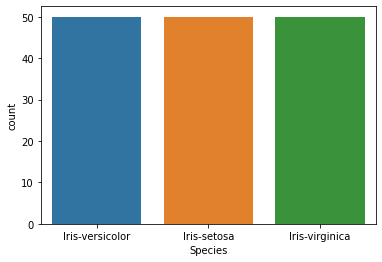

In [6]:
sns.countplot(df.Species)
#absolutely great the data isn't skewed

In [7]:
#splitting data into features and a target
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [8]:
y

71     Iris-versicolor
7          Iris-setosa
0          Iris-setosa
72     Iris-versicolor
61     Iris-versicolor
            ...       
86     Iris-versicolor
140     Iris-virginica
145     Iris-virginica
102     Iris-virginica
58     Iris-versicolor
Name: Species, Length: 150, dtype: object

In [9]:
#labeling our target with numerical values
trgt_map = {trgt[i]: i for i in range(len(trgt))}

y = y.map(trgt_map)
y

71     0
7      1
0      1
72     0
61     0
      ..
86     0
140    2
145    2
102    2
58     0
Name: Species, Length: 150, dtype: int64

In [10]:
kmeans = KMeans(n_clusters = len(trgt), random_state = 0)

In [11]:
np.array(y)

array([0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 1, 0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 0,
       2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0,
       2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1,
       0, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1,
       2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0], dtype=int64)

In [12]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 1,
       2, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0,
       0, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0,
       2, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1,
       2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0])

In [13]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
71,6.1,2.8,4.0,1.3
7,5.0,3.4,1.5,0.2
0,5.1,3.5,1.4,0.2
72,6.3,2.5,4.9,1.5
61,5.9,3.0,4.2,1.5
...,...,...,...,...
86,6.7,3.1,4.7,1.5
140,6.7,3.1,5.6,2.4
145,6.7,3.0,5.2,2.3
102,7.1,3.0,5.9,2.1


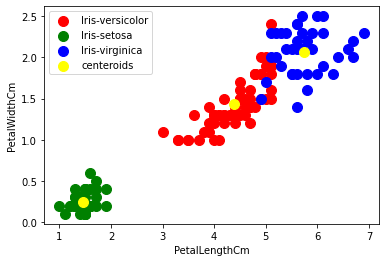

In [14]:
#visualising on the petal's length and width
colors = ['red', 'green', 'blue']

for i in range(len(trgt)):
    plt.scatter(x.iloc[y_kmeans == i, 2], x.iloc[y_kmeans == i, 3], c = colors[i],s = 100, label = trgt[i])
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'yellow', label = 'centeroids')    

    
plt.xlabel(x.columns[2])
plt.ylabel(x.columns[3])
plt.legend()
plt.show()

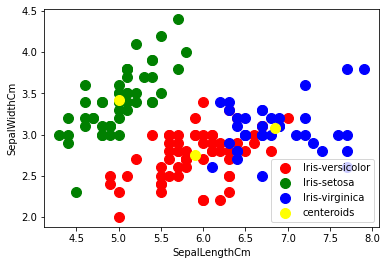

In [15]:
#visualizing on the sepal's length and width
for i in range(len(trgt)):
    plt.scatter(x.iloc[y_kmeans == i, 0], x.iloc[y_kmeans == i, 1], c = colors[i],s = 100, label = trgt[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'centeroids')    

    
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])    
plt.legend()
plt.show()

In [16]:
#and finally we print the classifcation report
from sklearn.metrics import classification_report

print(classification_report(np.array(y), y_kmeans))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        50
           1       1.00      1.00      1.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

